In [ ]:
!pip install matplotlib
!pip install pandas
!pip install numpy
!pip install sympy

In [223]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import math

In [227]:
def SolveEq(step_x=0.01, step_t=0.01):
  # default is int round
  nx = round(1/step_x)
  nt = round(1/step_t)

  a=0.0313

  # boundary condition when t=0
  def mu(x):
    return x**4-x
  # boundary condition when x=0
  def mu_1(t):
    return t**2-t        
  # boundary condition when x=1
  def mu_2(t):
    return t**2+t*(1-math.exp(1)) 

  def f(x, t):
    return x+2*t-math.exp(x)-a*(12*(x**2)-t*math.exp(x))
  # exact solution of our problem
  def u(x,t):
    return x**4-x+t*x+t**2-t*math.exp(x)
    
  # grid of approximate solution
  Grid = [[0 for j in range(nx+1)] for i in range(nt+1)]

  # fill grid with initial conditions
  for i in range(nt):
    Grid[i][0] = mu_1(i*step_t)
  for i in range(nx):
    Grid[0][i] = mu(i*step_x)
  for i in range(nt):
    Grid[i][nx] = mu_2(i*step_t)

  # solution grid
  SolGrid = [[u(j*step_x, i*step_t) for j in range(nx+1)] for i in range(nt+1)]

  # solving tridiagonal matrix equation
  def Thomas_method(a, b, c, d):
    n = len(b)
    x = [0 for i in range(n)]
    for i in range(1, n, 1):
        w = a[i]/b[i-1]
        b[i] = b[i]-c[i-1]*w
        d[i] = d[i]-w*d[i-1]
    x[n-1] = d[n-1]/b[n-1]
    for i in range(n-2, -1, -1):
        x[i] = (d[i]-c[i]*x[i+1])/b[i]
    return x


  # value for simplifying denote
  r = a*step_t/(2*(step_x**2))

  # right part of matrix equation
  def Compute_run():
    # num 1 is the bottom diagonal number, num 2 - middle, num 3 - upper
    for j in range(1, nt+1):
        # We shouldn't even store matrix of u^{i}_{j} coefficients, but
        # we have to store F vector of right part
        F = []
        for k in range(1, nx):
          F.append(r*Grid[j-1][k+1] + (1-2*r)*Grid[j-1][k] + r*Grid[j-1][k-1] + step_t*f((k)*step_x, (j-1/2)*step_t) )
          if k == 1:
            F[k-1] += r*mu_1(j*step_t)
          if k == nx-1:
            F[k-1] += r*mu_2(j*step_t)

        a = [0]
        for i in range(nx-2):
          a.append(-r)
        b = []
        for i in range(nx-1):
          b.append(1+2*r)
        c = []
        for i in range(nx-2):
          c.append(-r)
        c.append(0)
        tmp = Thomas_method(a, b, c, F)
        for i in range(1, nx):
          Grid[j][i] = tmp[i-1]

  Compute_run()
  return Grid, SolGrid, step_x, step_t

Grid, SolGrid, step_x, step_t = SolveEq()
nx = round(1/step_x)
nt = round(1/step_t)
print(SolGrid)
print(Grid)

[[0.0, -0.00999999, -0.01999984, -0.02999919, -0.03999744, -0.04999375, -0.05998704, -0.06997599, -0.07995904, -0.08993439, -0.0999, -0.10985359, -0.11979263999999999, -0.12971439, -0.13961584000000002, -0.14949374999999998, -0.15934464, -0.16916479, -0.17895023999999998, -0.18869679, -0.19840000000000002, -0.20805519, -0.21765744, -0.22720159, -0.23668224, -0.24609375, -0.25543024000000003, -0.26468559, -0.27385344, -0.28292719, -0.2919, -0.30076479, -0.30951424, -0.31814079, -0.32663664000000003, -0.33499375000000003, -0.34320384, -0.35125839, -0.35914864, -0.36686559, -0.3744, -0.38174239000000004, -0.38888304, -0.39581199, -0.40251904, -0.40899375, -0.41522544, -0.42120319, -0.42691584, -0.43235199, -0.4375, -0.44234799, -0.44688384000000003, -0.45109519, -0.45496944, -0.45849375000000003, -0.46165504, -0.46443999, -0.46683504, -0.46882639, -0.4704, -0.47154159, -0.47223664, -0.47247039, -0.47222784, -0.47149375, -0.47025264, -0.46848879, -0.46618624, -0.46332879, -0.4599, -0.45588

In [228]:
# Compute error
def DisNorm(Grid, SolGrid):
  max1 = 0
  for i in range(1, nt-1):
    for j in range(1, nx-1):
      if abs(Grid[i][j]-SolGrid[i][j]) > max1:
        max1 = abs(Grid[i][j]-SolGrid[i][j])
  return max1

print(DisNorm(Grid, SolGrid))

5.794835289063549e-06


**Errors table**

In [229]:
x_vals = [0.1, 0.01, 0.001]
t_vals = [0.1, 0.01, 0.001]

for x in x_vals:
  for t in t_vals:
    Grid, SolGrid, step_x, step_t = SolveEq(x, t)
    nx = round(1/step_x)
    nt = round(1/step_t)
    print(DisNorm(Grid, SolGrid), end=' | ')
  print()

0.00047892395885895667 | 0.0005761192529697423 | 0.0005855352240295986 | 
4.812752246285967e-06 | 5.794835289063549e-06 | 5.889934272751418e-06 | 
4.813061682540365e-08 | 5.7952761478574644e-08 | 5.890488474769029e-08 | 


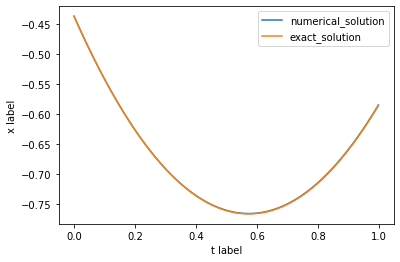

In [222]:
def Solutions_plot(x_param):
    fig, ax = plt.subplots()
    num = round(x_param/step_x-1)
    t_appr = [step_t*k for k in range(nt)]
    y_appr = [Grid[k][num] for k in range(nt)]
    y_exact = [SolGrid[k][num] for k in range(nt)]
    ax.plot(t_appr, y_appr, label='numerical_solution')  # Plot some data on the axes.
    ax.plot(t_appr, y_exact, label='exact_solution')  # Plot more data on the axes..
    plt.xlabel('t label')
    plt.ylabel('x label')
    plt.legend()

Solutions_plot(0.5)

In [ ]:
# Table of values
def MakeDf(data):
  dist = {'t':[(i+1)*step_t for i in range(nt)]}
  for i in range(nt):
    for j in range(nx-1):
      if str((j+1)*step_x) not in dist.keys():
        dist[str((j+1)*step_x)] = [data[i][j]]
      else:
        dist[str((j+1)*step_x)].append(data[i][j])
  return pd.DataFrame(dist)

print(MakeDf(Grid))
print()
print(MakeDf(SolGrid))

         t      0.01      0.02  ...      0.97      0.98      0.99
0    0.001 -0.002087 -0.011130  ... -0.112248 -0.085918 -0.055553
1    0.002 -0.004792 -0.012541  ... -0.113639 -0.086157 -0.051338
2    0.003 -0.006799 -0.014105  ... -0.114728 -0.085859 -0.049533
3    0.004 -0.008455 -0.015643  ... -0.115581 -0.085646 -0.048935
4    0.005 -0.009915 -0.017112  ... -0.116321 -0.085661 -0.049005
..     ...       ...       ...  ...       ...       ...       ...
995  0.996 -0.014579 -0.024286  ... -0.751363 -0.741619 -0.731059
996  0.997 -0.013588 -0.023295  ... -0.751038 -0.741311 -0.730768
997  0.998 -0.012595 -0.022302  ... -0.750710 -0.741000 -0.730475
998  0.999 -0.011600 -0.021307  ... -0.750381 -0.740688 -0.730181
999  1.000 -0.010603 -0.020311  ... -0.750049 -0.740374 -0.729884

[1000 rows x 100 columns]

         t      0.01      0.02  ...      0.97      0.98      0.99
0    0.001 -0.010999 -0.020999  ... -0.086374 -0.059315 -0.031104
1    0.002 -0.011996 -0.021996  ... -0.088039 -0